In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [76]:
df= pd.read_csv("final_dataset.csv")

In [77]:
df.duplicated().sum()
df.shape

(80368, 53)

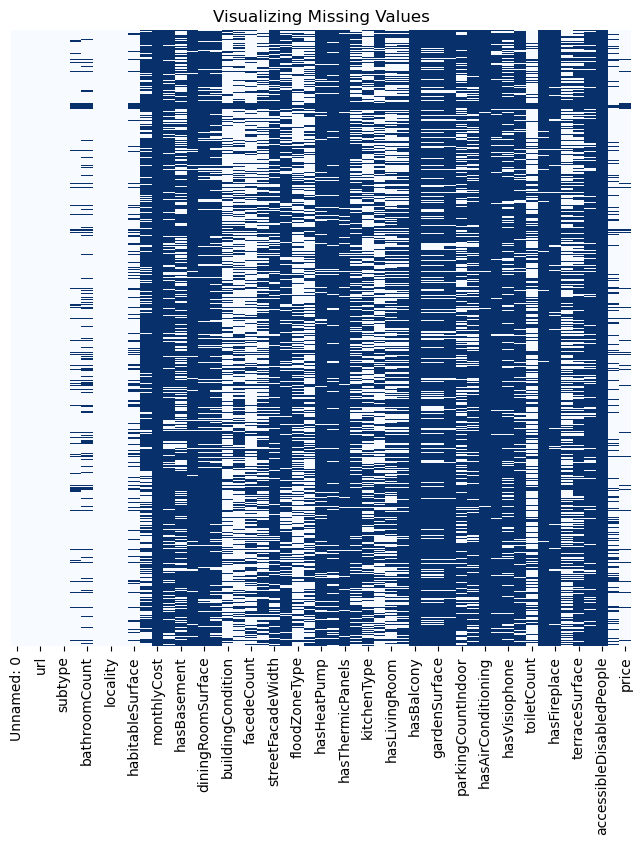

In [78]:
plt.figure(figsize=(8,8))
plt.title("Visualizing Missing Values")
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Blues")
plt.show()

In [ ]:
df.isnull().sum()/df.shape[0]*100 

Unnamed: 0                    0.000000
id                            0.000000
url                           0.000000
type                          0.000000
subtype                       0.000000
bedroomCount                  8.473522
bathroomCount                17.041609
province                      0.000000
locality                      0.000000
postCode                      0.000000
habitableSurface             15.659218
roomCount                    72.690623
monthlyCost                 100.000000
hasAttic                     84.426637
hasBasement                  63.524039
hasDressingRoom              96.730042
diningRoomSurface            91.413249
hasDiningRoom                82.404688
buildingCondition            27.841927
buildingConstructionYear     38.898567
facedeCount                  33.755973
floorCount                   53.282401
streetFacadeWidth            80.701274
hasLift                      76.304002
floodZoneType                44.672009
heatingType              

In [84]:
cols_todrop=df.columns[df.isnull().sum()/df.shape[0]*100>40]
cols_todrop, len(cols_todrop)

(Index(['roomCount', 'monthlyCost', 'hasAttic', 'hasBasement',
        'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom', 'floorCount',
        'streetFacadeWidth', 'hasLift', 'floodZoneType', 'heatingType',
        'hasHeatPump', 'hasPhotovoltaicPanels', 'hasThermicPanels',
        'kitchenSurface', 'kitchenType', 'landSurface', 'hasLivingRoom',
        'livingRoomSurface', 'hasBalcony', 'hasGarden', 'gardenSurface',
        'gardenOrientation', 'parkingCountIndoor', 'parkingCountOutdoor',
        'hasAirConditioning', 'hasArmoredDoor', 'hasVisiophone', 'hasOffice',
        'hasSwimmingPool', 'hasFireplace', 'hasTerrace', 'terraceSurface',
        'terraceOrientation', 'accessibleDisabledPeople'],
       dtype='object'),
 36)

In [42]:
df.drop(columns=cols_todrop, inplace=True)
df.drop(columns=["Unnamed: 0","id","url"], inplace=True)
df.isnull().sum(), df.shape

(type                            0
 subtype                         0
 bedroomCount                 6810
 bathroomCount               13696
 province                        0
 locality                        0
 postCode                        0
 habitableSurface            12585
 buildingCondition           22376
 buildingConstructionYear    31262
 facedeCount                 27129
 toiletCount                 25274
 epcScore                    14977
 price                        3998
 dtype: int64,
 (80368, 14))

In [43]:
df=df[~(df["price"].isnull())]
df.isnull().sum(), df.shape

(type                            0
 subtype                         0
 bedroomCount                 2820
 bathroomCount                9705
 province                        0
 locality                        0
 postCode                        0
 habitableSurface             8590
 buildingCondition           18381
 buildingConstructionYear    27268
 facedeCount                 23136
 toiletCount                 21280
 epcScore                    11966
 price                           0
 dtype: int64,
 (76370, 14))

In [44]:
df[df.isnull().sum(axis=1)>2]

,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,buildingCondition,buildingConstructionYear,facedeCount,toiletCount,epcScore,price
87,HOUSE,APARTMENT_BLOCK,NaN,NaN,Brussels,Etterbeek,1040,293.0,NaN,1918.0,2.0,NaN,F,850000.0
94,APARTMENT,APARTMENT,1.0,1.0,Brussels,Etterbeek,1040,85.0,NaN,NaN,NaN,1.0,E,298000.0
102,APARTMENT,APARTMENT,3.0,1.0,Brussels,Etterbeek,1040,NaN,TO_RESTORE,NaN,NaN,2.0,D,598000.0
117,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,1999.0,NaN,1.0,NaN,325000.0
124,HOUSE,EXCEPTIONAL_PROPERTY,5.0,NaN,Brussels,Etterbeek,1040,706.0,AS_NEW,NaN,2.0,8.0,NaN,1675000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80355,APARTMENT,SERVICE_FLAT,1.0,1.0,East Flanders,Maldegem,9990,60.0,NaN,2018.0,NaN,NaN,NaN,188500.0
80356,HOUSE,COUNTRY_COTTAGE,3.0,NaN,East Flanders,Maldegem,9990,140.0,NaN,1850.0,4.0,NaN,F,622900.0
80357,APARTMENT,SERVICE_FLAT,2.0,NaN,East Flanders,Maldegem,9990,78.0,NaN,2018.0,NaN,NaN,NaN,226500.0
80361,APARTMENT,APARTMENT,2.0,NaN,East Flanders,Maldegem,9990,NaN,GOOD,NaN,2.0,NaN,E,199000.0


In [21]:
df=df[~(df.isnull().sum(axis=1)>2)]
df.isnull().sum(), df.shape

(type                            0
 subtype                         0
 bedroomCount                  694
 bathroomCount                2558
 province                        0
 locality                        0
 postCode                        0
 habitableSurface             2747
 buildingCondition            8694
 buildingConstructionYear    15288
 facedeCount                 12962
 toiletCount                  9637
 epcScore                     4939
 price                           0
 dtype: int64,
 (59180, 14))

In [22]:
df = df.replace([np.inf, -np.inf], np.nan)
numeric_cols = df.select_dtypes("number")
numeric_cols.corr()*100

,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,toiletCount,price
bedroomCount,100.000000,13.719773,-1.028516,11.402745,-18.227192,19.014531,8.873747,35.917948
bathroomCount,13.719773,100.000000,-1.487296,1.707194,-9.268352,1.634677,1.754592,10.215177
postCode,-1.028516,-1.487296,100.000000,-0.195328,9.264400,5.002338,-0.506984,-3.684490
habitableSurface,11.402745,1.707194,-0.195328,100.000000,-8.544488,4.329324,1.180737,8.635238
buildingConstructionYear,-18.227192,-9.268352,9.264400,-8.544488,100.000000,7.290303,-1.597416,4.170043
facedeCount,19.014531,1.634677,5.002338,4.329324,7.290303,100.000000,1.739545,17.546196
toiletCount,8.873747,1.754592,-0.506984,1.180737,-1.597416,1.739545,100.000000,9.333123
price,35.917948,10.215177,-3.684490,8.635238,4.170043,17.546196,9.333123,100.000000


In [23]:
df=df[~(df["bedroomCount"].isnull())]
df=df[~(df["facedeCount"].isnull())]
df.drop(columns="buildingConstructionYear", inplace=True)

<Axes: title={'center': 'Visualizing Missing Values'}>

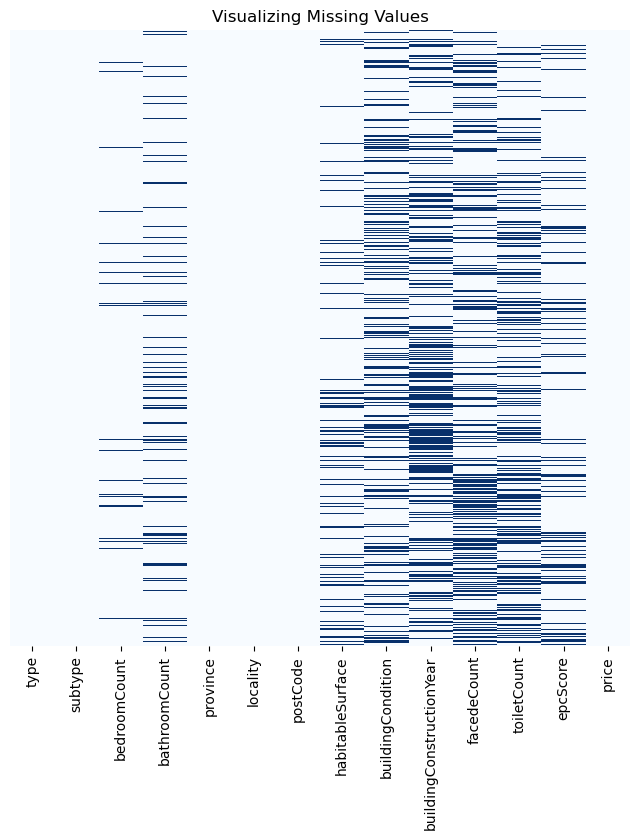

In [55]:
plt.figure(figsize=(8,8))
plt.title("Visualizing Missing Values")
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Blues")

In [25]:
numeric_cols.corr()

,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,toiletCount,price
bedroomCount,1.000000,0.137198,-0.010285,0.114027,-0.182272,0.190145,0.088737,0.359179
bathroomCount,0.137198,1.000000,-0.014873,0.017072,-0.092684,0.016347,0.017546,0.102152
postCode,-0.010285,-0.014873,1.000000,-0.001953,0.092644,0.050023,-0.005070,-0.036845
habitableSurface,0.114027,0.017072,-0.001953,1.000000,-0.085445,0.043293,0.011807,0.086352
buildingConstructionYear,-0.182272,-0.092684,0.092644,-0.085445,1.000000,0.072903,-0.015974,0.041700
facedeCount,0.190145,0.016347,0.050023,0.043293,0.072903,1.000000,0.017395,0.175462
toiletCount,0.088737,0.017546,-0.005070,0.011807,-0.015974,0.017395,1.000000,0.093331
price,0.359179,0.102152,-0.036845,0.086352,0.041700,0.175462,0.093331,1.000000


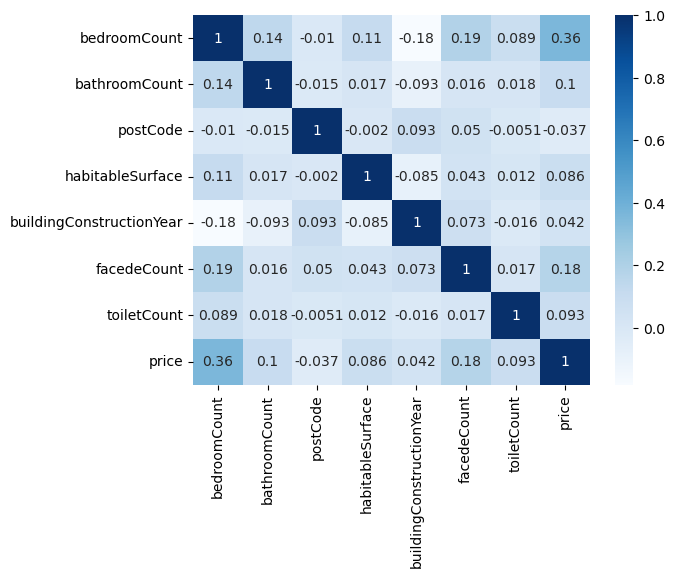

In [26]:
sns.heatmap(numeric_cols.corr(),  cmap="Blues", annot=True)
plt.show()

In [27]:
for col in numeric_cols:
    print(numeric_cols[col].skew(), col)

9.808857166173363 bedroomCount
223.15621148083693 bathroomCount
0.15525467045603805 postCode
191.29556230248323 habitableSurface
-0.9494139038649008 buildingConstructionYear
14.805526258445331 facedeCount
217.1052495718164 toiletCount
7.1756234092076445 price


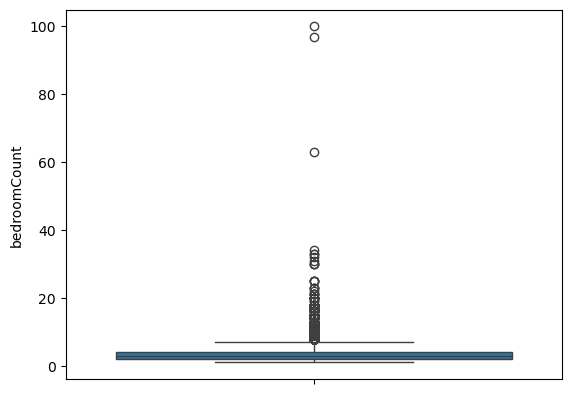

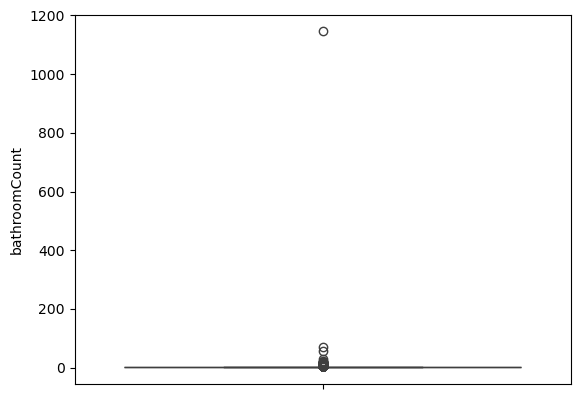

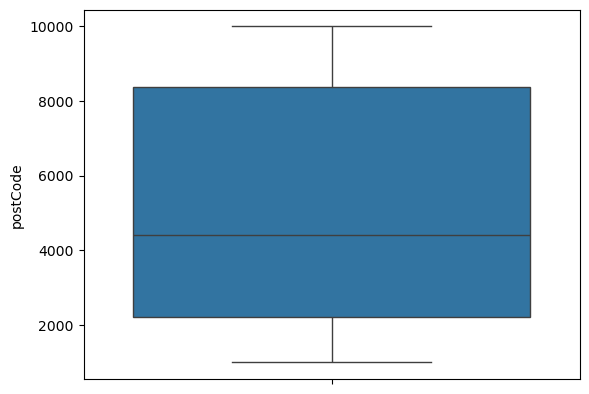

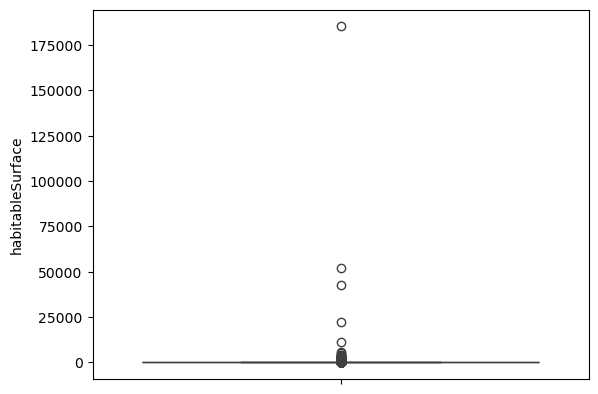

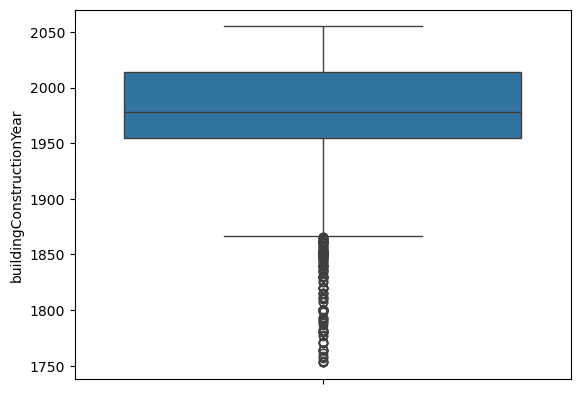

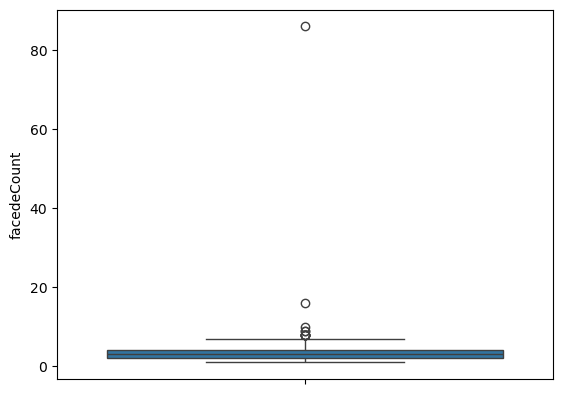

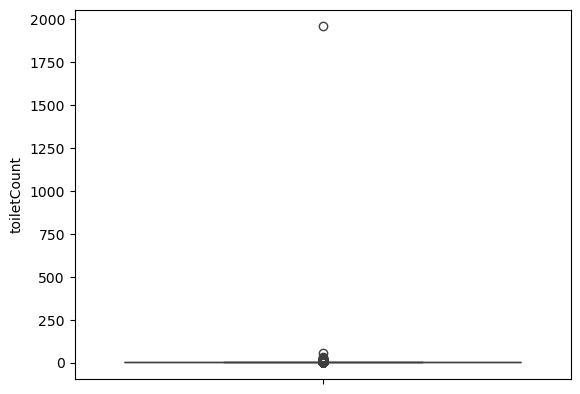

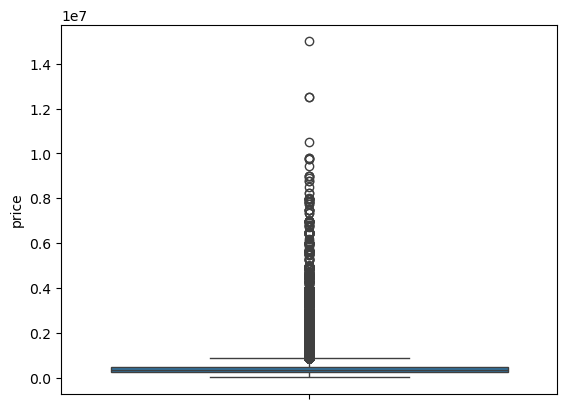

In [46]:
#for col in numeric_cols:
for col in numeric_cols:
    sns.boxplot(numeric_cols[col])
    plt.show()

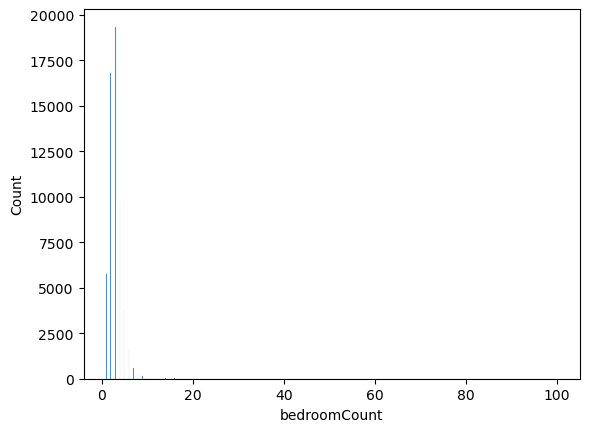

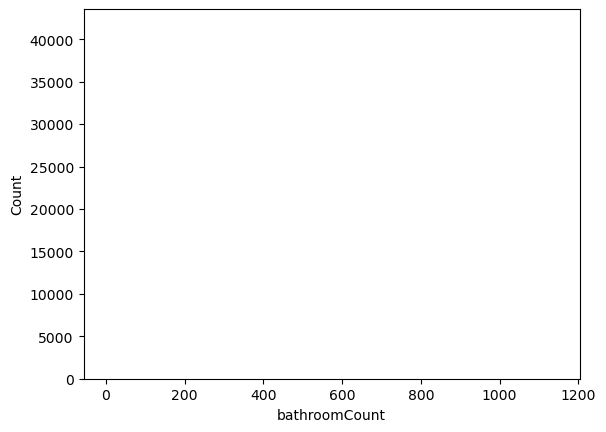

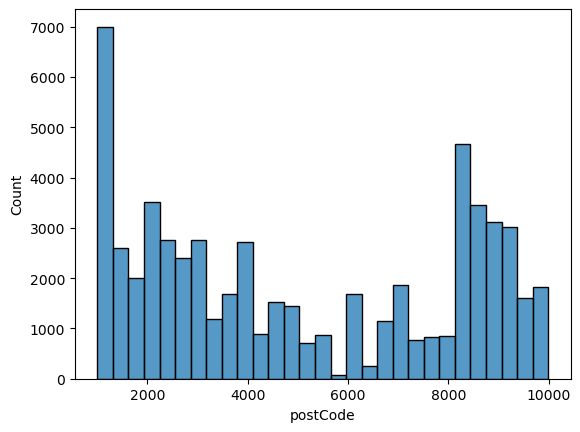

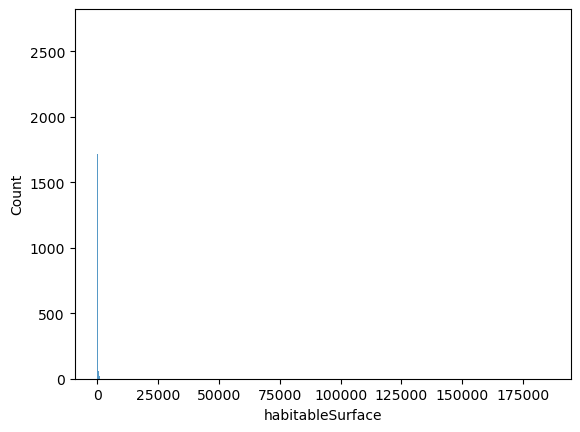

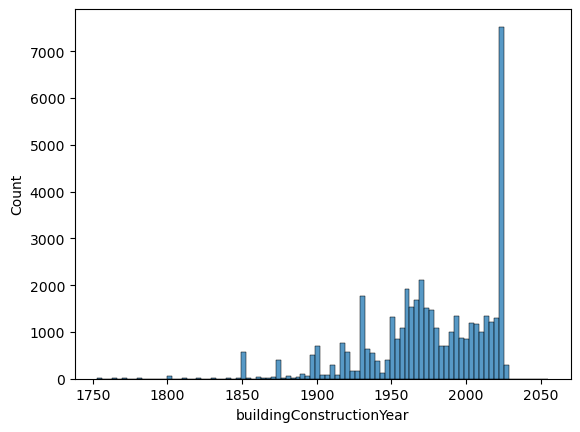

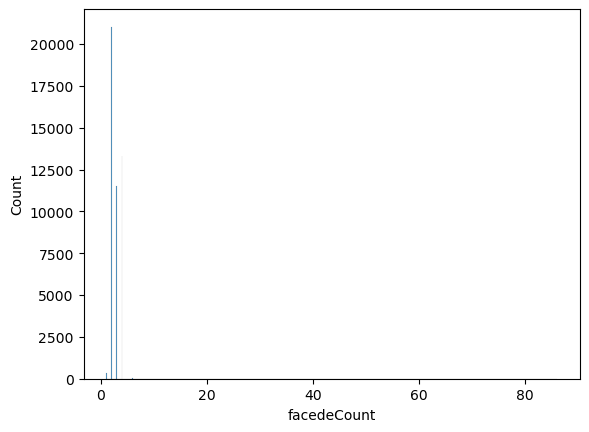

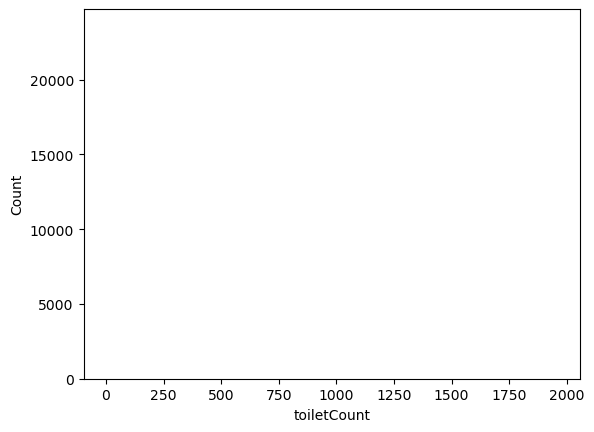

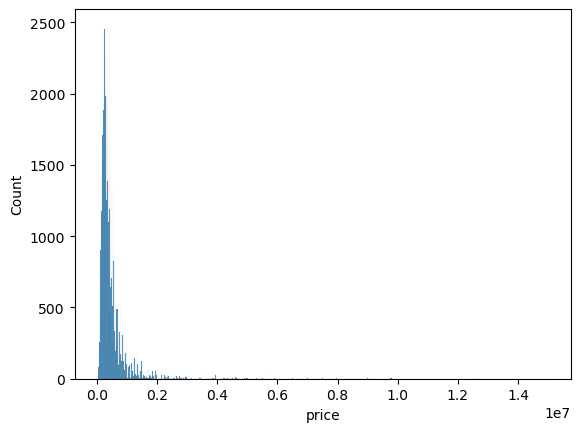

In [28]:
for col in numeric_cols:
    sns.histplot(data = numeric_cols[col])
    plt.show()

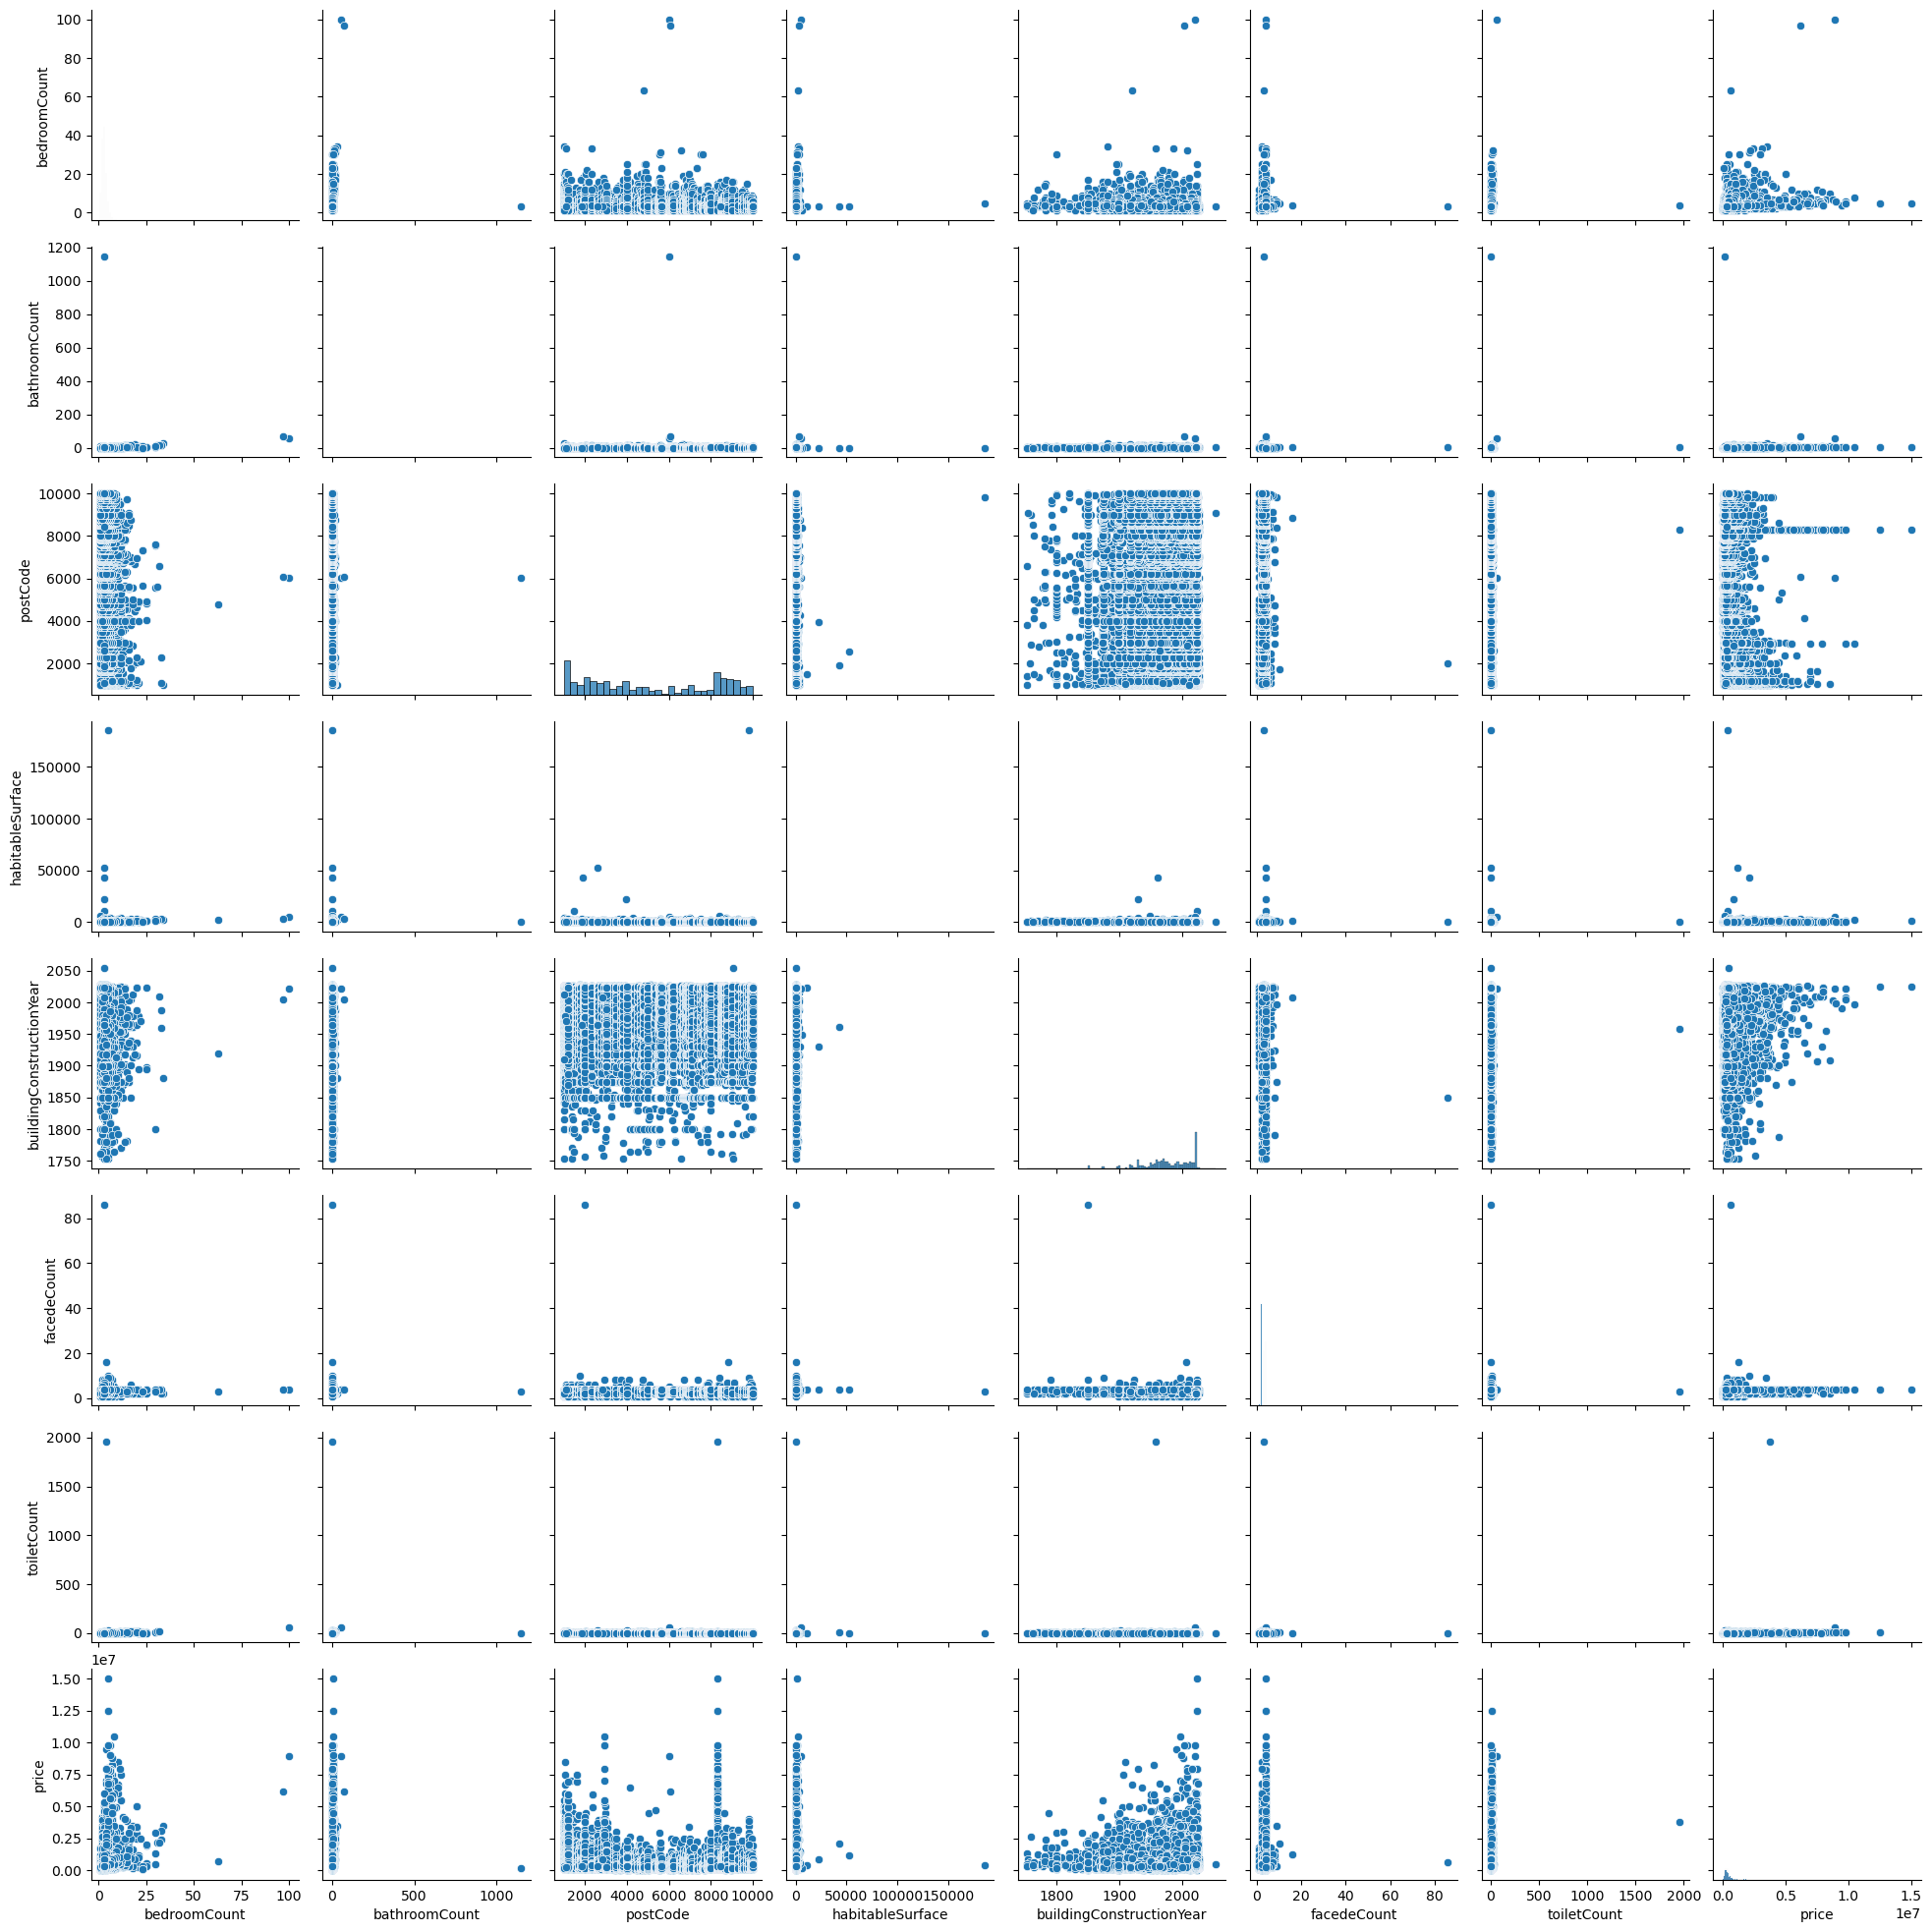

In [29]:
sns.pairplot(numeric_cols)
plt.show()

In [30]:
df=df[~(df["bedroomCount"].isnull())]
df=df[~(df["facedeCount"].isnull())]
df.isnull().sum(), df.shape

(type                    0
 subtype                 0
 bedroomCount            0
 bathroomCount        2246
 province                0
 locality                0
 postCode                0
 habitableSurface     2302
 buildingCondition    7477
 facedeCount             0
 toiletCount          8053
 epcScore             3760
 price                   0
 dtype: int64,
 (45709, 13))

In [31]:
cat_cols=df.select_dtypes("object")
for col in cat_cols:
    df[col]=df[col].str.lower()
    print(f"{col} :{df[col].nunique()} : {df[col].unique()}")

type :2 : ['apartment' 'house']
subtype :24 : ['apartment' 'house' 'flat_studio' 'duplex' 'penthouse' 'apartment_block'
 'mansion' 'exceptional_property' 'mixed_use_building' 'triplex'
 'ground_floor' 'loft' 'villa' 'town_house' 'manor_house' 'kot'
 'farmhouse' 'bungalow' 'service_flat' 'chalet' 'country_cottage'
 'other_property' 'castle' 'pavilion']
province :11 : ['brussels' 'antwerp' 'west flanders' 'liège' 'east flanders'
 'walloon brabant' 'luxembourg' 'flemish brabant' 'namur' 'limburg'
 'hainaut']
locality :3319 : ['etterbeek' 'bruxelles' 'brussels' ... 'wontergem' 'evergem (evergem)'
 'wippelgem']
buildingCondition :6 : ['good' 'to_be_done_up' 'as_new' 'just_renovated' 'to_renovate' nan
 'to_restore']
epcScore :19 : ['c' 'e' 'f' 'd' 'g' 'b' nan 'a' 'a++' 'a+' 'f_c' 'g_c' 'd_c' 'f_d' 'e_c'
 'g_e' 'e_d' 'c_b' 'x' 'g_f']


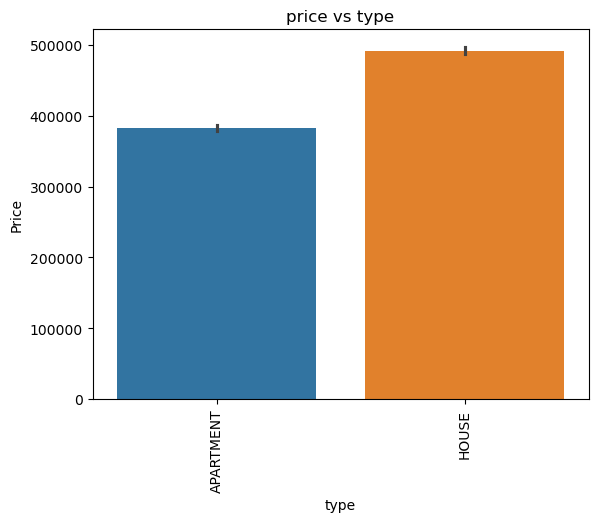

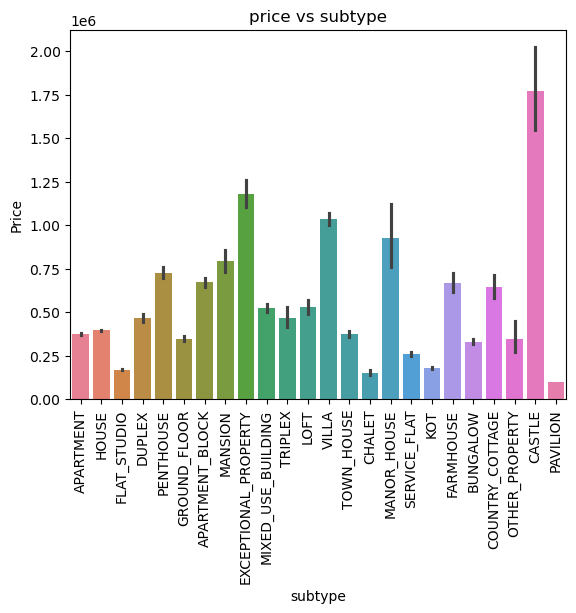

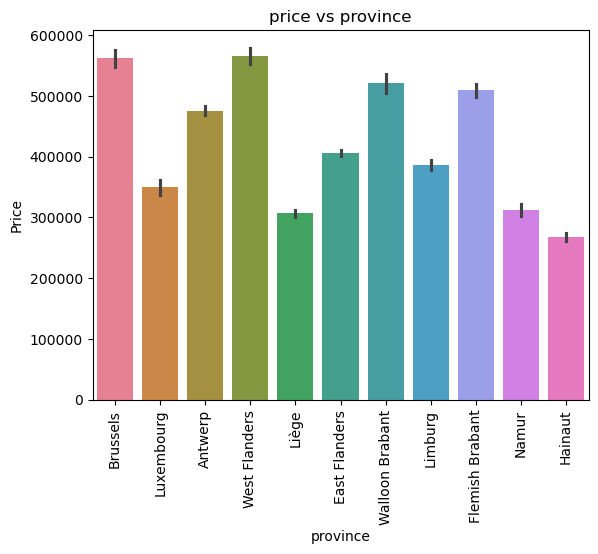

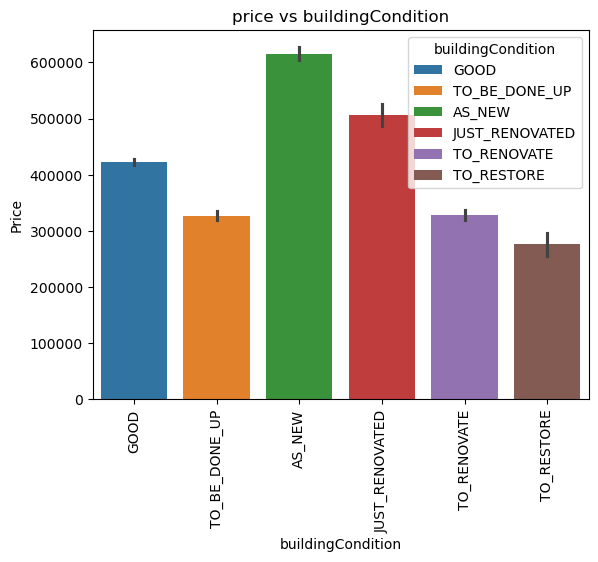

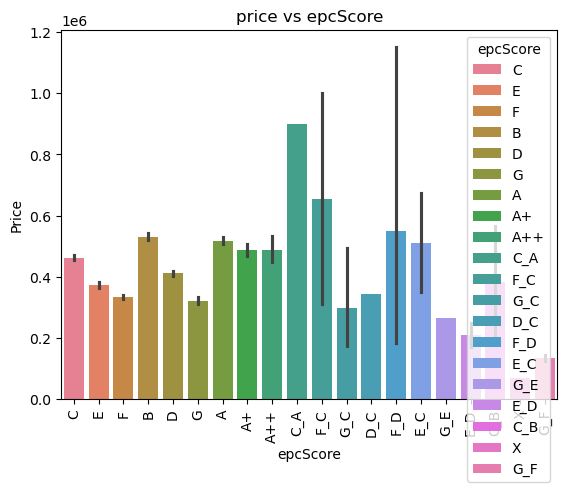

In [ ]:
cat_cols = df.select_dtypes("object")
cat_cols["price"]=df["price"]
plt.figure(figsize=(8,8))
for i,  col in cat_cols:
    if df[col].nunique()<25:
        sns.barplot(data= cat_cols,x=col,y="price", hue=col)
        plt.title(f"price vs {col}")
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.xticks(rotation=90)
        plt.show()

KeyboardInterrupt: 

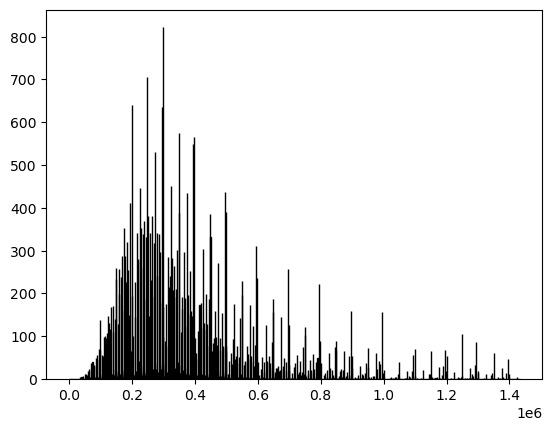

In [33]:
sns.histplot(df)
plt.show()

In [ ]:
df["epcScore"].value_counts()

In [ ]:
df["epcScore"]=df["epcScore"].str.replace(["G_C"|"E_C"|"C_B"|"E_D"|"F_C"|"F_D"|"G_E"|"D_C"|"X"|"G_F"],"not_good")

In [ ]:
for col in df.columns:
    print(f"{col} --------{df[col].dtype}")
    print()